Import all necessary libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [4]:
insurance_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [8]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


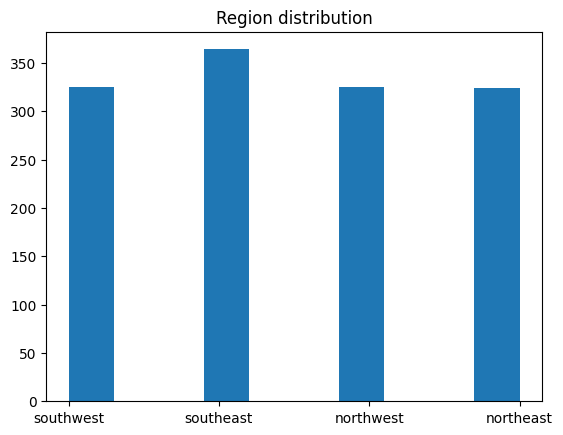

In [9]:
plt.hist(insurance_dataset['region'])
plt.title('Region distribution')
plt.show()

From the above graph,
southeast region people are high in this dataset


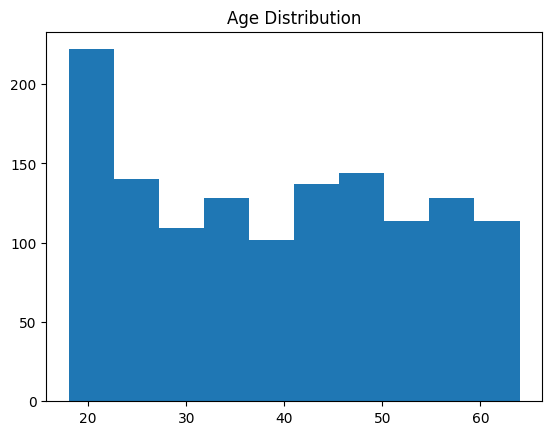

In [10]:
plt.hist(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

By above plot, we can say that,the age group of 20-26 are showing much intrest to take health insurance than the other age groups

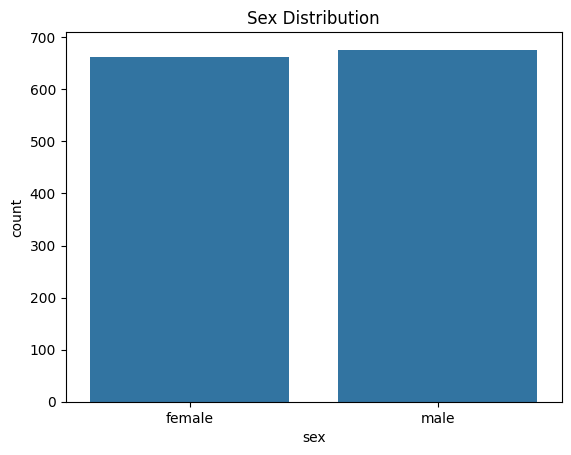

In [11]:
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()


From the above graph,there is a slight difference between male and female in taking the health insurance

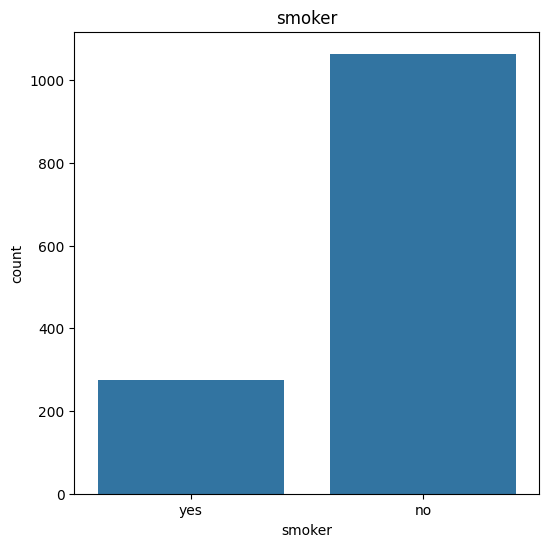

In [12]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In the given dataset the smokers are much higher than the non-smokers

**DATA PRE-PROCESSING**

In [13]:
#Label Encoding: converting categorical data into numerical data

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [15]:
insurance_dataset['smoker']=label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region']=label_encoder.fit_transform(insurance_dataset['region'])
insurance_dataset['sex']=label_encoder.fit_transform(insurance_dataset['sex'])

In [16]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [18]:
#we successfully converted the categorical data to numerical data

**Dependent and Independent variable**

**Splitting the Features and Target**

In [19]:
x=insurance_dataset.drop('charges',axis=1)
y=insurance_dataset['charges']



**Dividing the dataset into train and test**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
print(x.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**MODEL TRAINING**

LINEAR REGRESSION

In [22]:
# loading the Linear Regression model
regressor = LinearRegression()

In [23]:
regressor.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [24]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [25]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7417049283233981


From this R squared vale,the value is so close to 1,so it is good model to predict the final insurance cost based on the input parameters

Building a Predictive System

In [33]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[28294.17982329]
The insurance cost is USD  28294.179823294275


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Conclusion:**
The model which we developed here is a good model to predicting the final insurance cost and here we use linear regression to train our dataset and for predicting the final values.
